# Written by jonathan kjellen


In [ ]:
# The following file paths need to contain the correct files for this notebook to run:
file_path_debate_sentiment = "../data/Debates_sentiments.csv"

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import ast

In [48]:

df = pd.read_csv(file_path_debate_sentiment)

for i in range(len(df)):
    df.at[i,"answer"] = ast.literal_eval(df.iloc[i]["answer"])
df = df.drop_duplicates(subset='id_')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_                       1874 non-null   object 
 1   question                  1874 non-null   object 
 2   question_date             1874 non-null   object 
 3   answer                    1874 non-null   object 
 4   undertecknare_name        1874 non-null   object 
 5   undertecknare_partibet    1874 non-null   object 
 6   besvaradav_name           1874 non-null   object 
 7   besvaradav_partibet       1874 non-null   object 
 8   debattdag                 1530 non-null   object 
 9   ip_id                     1874 non-null   object 
 10  question_len              1874 non-null   int64  
 11  question_BERT_label       1874 non-null   object 
 12  question_BERT_label_prob  1874 non-null   float64
 13  question_BERT_probs       1874 non-null   object 
dtypes: float

# The sentiment of the questions

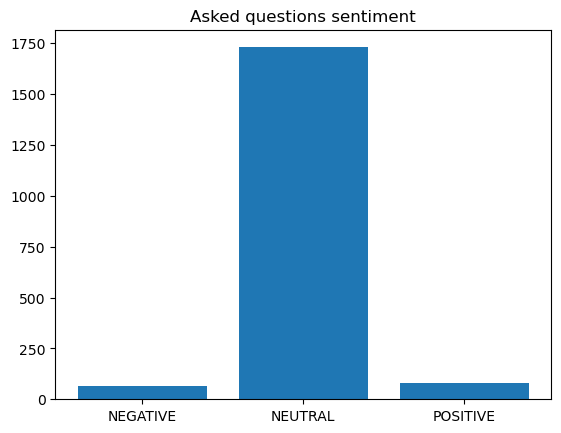

In [50]:
a = df["question_BERT_label"]
labels, counts = np.unique(a,return_counts=True)
ticks = range(len(counts))
plt.title("Asked questions sentiment")
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.show()

# The sentiment of all the answers

In [51]:
sentiment = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        sentiment[label] +=1

In [52]:
sentiment

{'POSITIVE': 1161, 'NEUTRAL': 10388, 'NEGATIVE': 114}

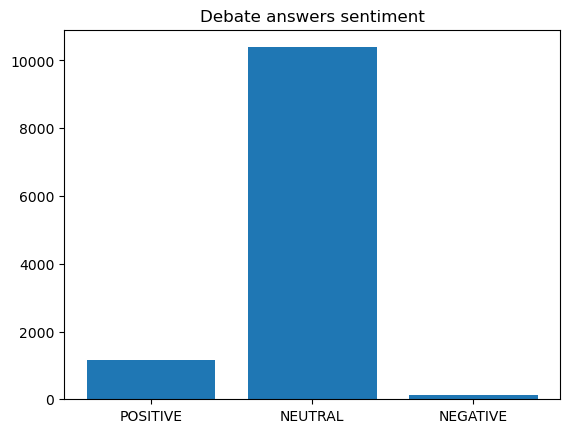

In [53]:
import numpy as np
list_items = [t[1] for t in list(sentiment.items())]
list_keys = list(sentiment.keys())
import matplotlib.pyplot as plt 
ticks = range(len(sentiment))
plt.title("Debate answers sentiment")
plt.bar(ticks,list_items, align='center')
plt.xticks(ticks, list_keys)
plt.show()

# Checking how many debate answers there are of the different sentiments based on the sentiment of the question:

In [54]:

negative_questions_answers = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
positive_questions_answers = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
neutral_questions_answers = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}

question_dict_num_labels = {
    "POSITIVE":positive_questions_answers,
    "NEGATIVE":negative_questions_answers,
    "NEUTRAL":neutral_questions_answers
}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    question_sentiment = question_dict_num_labels[df.iloc[i]["question_BERT_label"]]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        question_sentiment[label] +=1

[174, 285, 2]


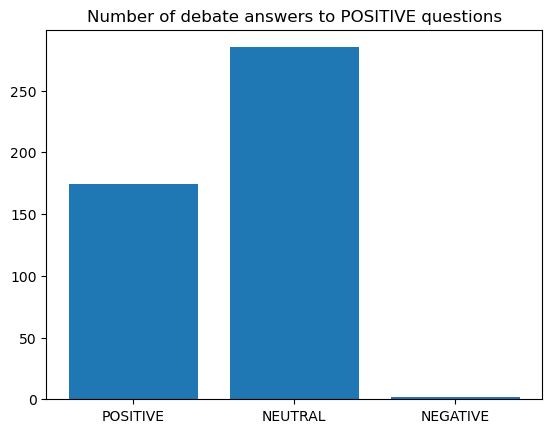

[22, 342, 14]


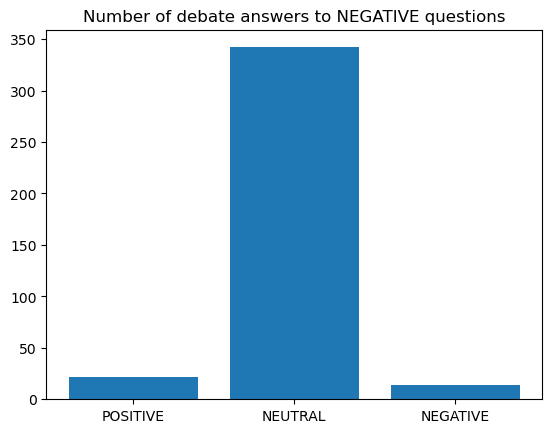

[965, 9761, 98]


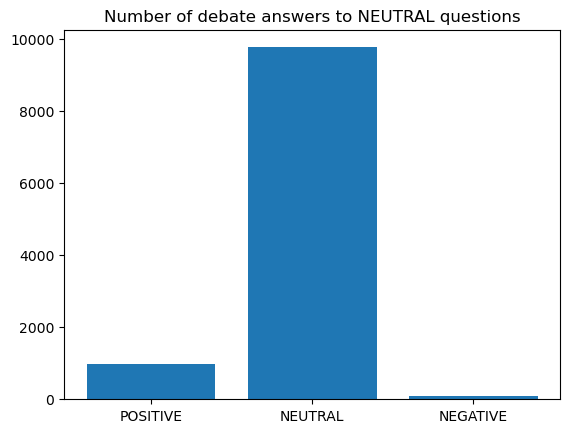

In [55]:
for key in question_dict_num_labels:
    list_items = [t[1] for t in list(question_dict_num_labels[key].items())]
    print(list_items)
    list_keys = list(question_dict_num_labels[key].keys())
    ticks = range(len(question_dict_num_labels[key]))
    plt.title("Number of debate answers to "+ key + " questions")
    plt.bar(ticks,list_items, align='center')
    plt.xticks(ticks, list_keys)
    plt.show()

# Checking the average certainty for every sentiment 

In [56]:
negative_questions_score = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
positive_questions_score = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
neutral_questions_score = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}

question_dict_score = {
    "POSITIVE":positive_questions_score,
    "NEGATIVE":negative_questions_score,
    "NEUTRAL":neutral_questions_score
}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    question_sentiment = question_dict_score[df.iloc[i]["question_BERT_label"]]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        score = df.iloc[i]["answer"][j]["answer_BERT_label_prob"]
        question_sentiment[label] += score

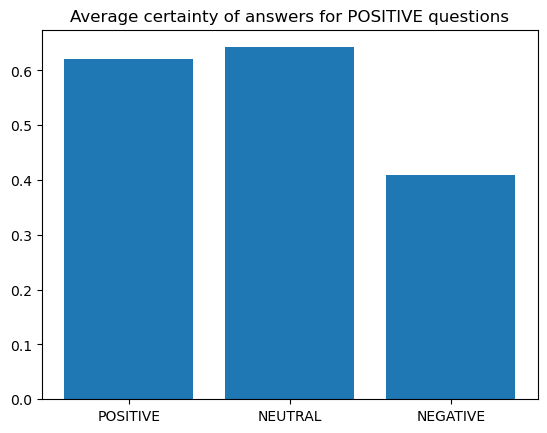

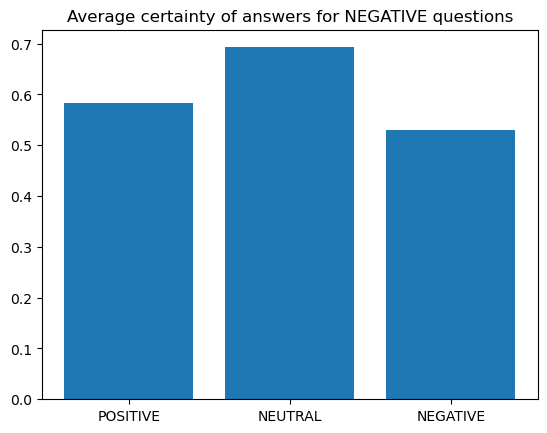

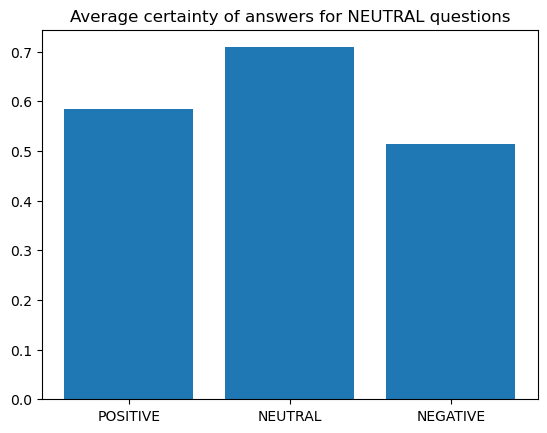

In [57]:
for key in question_dict_score:
    list_items = [t[1] for t in list(question_dict_score[key].items())]
    list_items_num_labels = [t[1] for t in list(question_dict_num_labels[key].items())]
    avg_score = [x / y for x, y in zip(list_items, list_items_num_labels)]
    list_keys = list(question_dict_score[key].keys())
    ticks = range(len(question_dict_score[key]))
    plt.title("Average certainty of answers for "+ key + " questions")
    plt.bar(ticks,avg_score, align='center')
    plt.xticks(ticks, list_keys)
    plt.show()

# 10 Random samples:

In [58]:
import random

random_numbers = random.sample(range(1, len(df)), 10)

print(random_numbers)

[1300, 1422, 1356, 1699, 710, 877, 333, 85, 652, 172]


In [59]:


for index in random_numbers:
    print(df.iloc[index])
    print(df.iloc[index]["answer"])

id_                                                                   h710195
question                    av Jens Holm (V)\ntill Finansminister Magdalen...
question_date                                                      2019-12-06
answer                      [{'answer': 'Anf.  1  Finansminister MAGDALENA...
undertecknare_name                                                  Jens Holm
undertecknare_partibet                                                      V
besvaradav_name                            Finansminister Magdalena Andersson
besvaradav_partibet                                                         S
debattdag                                                          2020-02-07
ip_id                                                             2019/20:195
question_len                                                              299
question_BERT_label                                                   NEUTRAL
question_BERT_label_prob                                        

# Checking the negative answers to negative questions:

In [60]:
count = 0
for i in range(len(df)):
    if df.iloc[i]["question_BERT_label"] == "NEGATIVE":
        for j in range(len(df.iloc[i]["answer"])):
            if df.iloc[i]["answer"][j]["answer_BERT_label"] == "NEGATIVE":
                print(df.iloc[i]["answer"][j])
                count +=1
print(count)

{'answer': 'Anf.\xa0\xa04\xa0\xa0THOMAS MORELL\xa0(SD):Fru talman! Tack för svaret, statsrådet!Det vi diskuterar nu är en världsbild som regeringen och Trafikverket beskriver. Men vi har också en världsbild där ute där de som nyttjar vårt vägsystem har en helt annan uppfattning.Det är människor som sitter och kör 8\xa0000–10\xa0000 mil om året och kanske har 20–30 års yrkeserfarenhet bakom sig. Många av dem sitter just i denna stund och tittar på den här debatten. Att säga att deras intryck av väghållningen inte stämmer är direkt att undervärdera deras kunskap.Trafikverket slår ifrån sig. Deras presschef vill inte ens kännas vid den kritik som finns där ute. Det har varit åtskilliga inlägg där både yrkesförare och andra har påtalat att det inte fungerar.Man hänger upp alltihop på den elektroniska meteorologen som står i diket. Den är oftast alldeles för sen. Det må vara att man är teknikintresserad. Men det hjälper föga när den som sedan tar till sig informationen vid en dataskärm inte

{'answer': 'Anf.\xa0\xa038\xa0\xa0NIKLAS WYKMAN\xa0(M):Fru talman! Är det alltså finansministerns besked här i dag att skatten på takeaway-mat och hämtkaffe inte kommer att införas? Det vore önskvärt för alla dem som sliter i restauranger och kaféer att få ett klart och tydligt besked.Skatter är givetvis alltid en utgift för alla som driver ett företag och som arbetar, men hotet om nya skatter måste också tas in när man planerar sin verksamhet. Här låter finansministern dem som driver kaféer och restauranger i Sverige leva under en mycket stor osäkerhet när det gäller om det ska komma en ny skatt.Det här är inte den enda nya skatt finansministern hotar Sveriges jobb och företag med. Finansministern har i intervju på intervju talat om att det ska höjas skatter på företagande.Fru talman! Det är en världsunik position i en kraftig och allvarlig lågkonjunktur att hota landets jobb med fler skattehöjningar. Det kan rimligtvis inte vara någon annan finansminister som agerar på det sättet. Nä

{'answer': 'Anf.\xa0\xa017\xa0\xa0STEN BERGHEDEN\xa0(M):Herr ålderspresident! Jag tackar ministern för svaret, även om svaret andas mycket att det här inte är regeringens fel utan att det är EU som har kommit fram till att så ska det vara.Både Miljöpartiet och Socialdemokraterna har aktivt drivit en linje i EU att utöka förbudet av användningen av blyammunition. Sveriges linje har, med stor majoritet, varit att inte utvidga förbudet. Det var också den linjen regeringen tvingades hålla vid den senaste omröstningen i ministerrådet.Det är absolut inte bra när regeringen först driver en viss linje i de samtal som förs och överläggningar som sker i EU. Självklart borde regeringen tidigt ha stämt av med riksdagen, och redan då inrättat sig efter riksdagens vilja, om vilken linje man borde ha drivit i samtalen med EU. Man överlämnar all makt i dessa ärenden till Reach. Det är helt orimligt, oavsett när dessa beslut fattades. Reachs inflytande behöver omprövas. Det är precis sådana beslut som 

{'answer': 'Anf.\xa0\xa0101\xa0\xa0KARIN RÅGSJÖ\xa0(V):Herr talman! Jag vill tacka minister Hallengren för det informativa svaret. Det är tydligt att vi är eniga, och mycket pågår för att förhindra liknande haverier.Jag brukar aldrig lyfta fram enskilda sjukhus förutom när de har just ett riksuppdrag, det vill säga ett nationellt uppdrag. Nya Karolinska sjukhuset berör hela Sverige. Det är ett universitetssjukhus med ett riksansvar som gäller högspecialiserad barnkirurgi.NKS har blivit ett känt sjukhus, inte tack vare vården utan på grund av skandaler som går igen på i stort sett alla plan. På Nya Karolinska sjukhuset arbetar en enormt duktig och kompetent personal. Det är personal i världsklass, och de bär upp vården – men de går också på knäna. Det handlar om en ekonomisk kollaps. Nya Karolinska sjukhuset har ett underskott på 1,5 miljarder för 2019, och 500 personer ska sägas upp. Det kommer att påverka personalen på golvet och därmed även patienterna.Herr talman! Personalsituatione

# Checking the average length of the answers:

In [61]:
negative_questions_length = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
positive_questions_length = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
neutral_questions_length = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}

question_dict_len = {
    "POSITIVE":positive_questions_length,
    "NEGATIVE":negative_questions_length,
    "NEUTRAL":neutral_questions_length
}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    question_sentiment = question_dict_len[df.iloc[i]["question_BERT_label"]]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        length = len(df.iloc[i]["answer"][j]["answer"])
        #score = df.iloc[i]["answer"][j]["answer_BERT_label_prob"]
        question_sentiment[label] += length

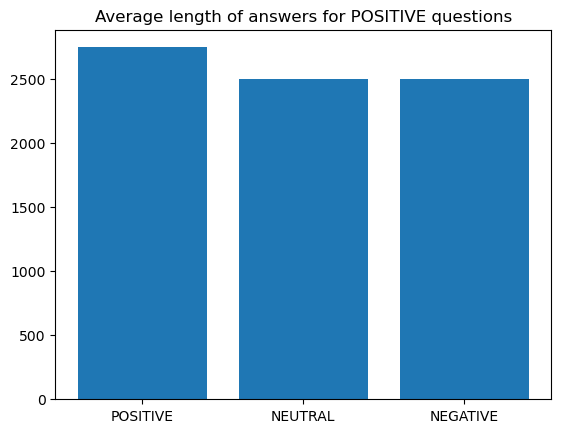

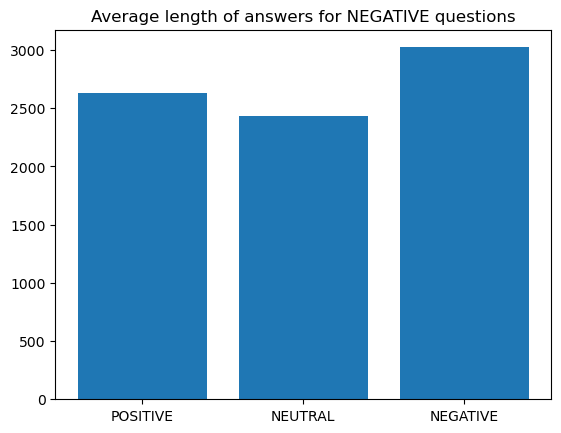

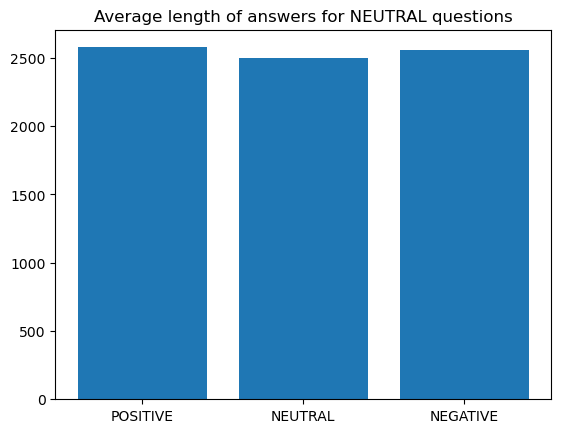

In [62]:
for key in question_dict_len:
    list_items = [t[1] for t in list(question_dict_len[key].items())]
    list_items_num_labels = [t[1] for t in list(question_dict_num_labels[key].items())]
    avg_score = [x / y for x, y in zip(list_items, list_items_num_labels)]
    list_keys = list(question_dict_len[key].keys())
    ticks = range(len(question_dict_len[key]))
    plt.title("Average length of answers for "+ key + " questions")
    plt.bar(ticks,avg_score, align='center')
    plt.xticks(ticks, list_keys)
    plt.show()

# Question sentiment for questions without answer

In [63]:
question_sentiment = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}


for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    if len(answers) == 0:
        label = df.iloc[i]["question_BERT_label"]
        question_sentiment[label] += 1

In [64]:
question_sentiment

{'POSITIVE': 18, 'NEUTRAL': 357, 'NEGATIVE': 18}

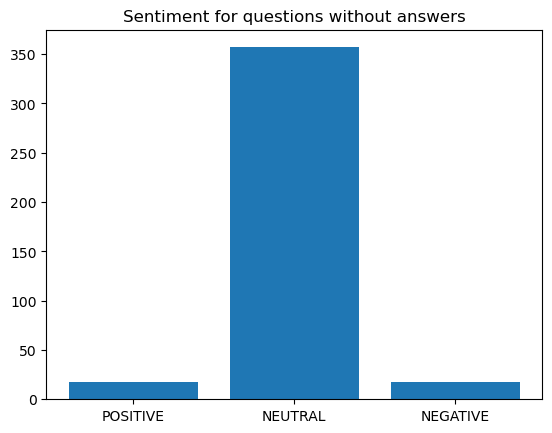

In [66]:
list_items = [t[1] for t in list(question_sentiment.items())]
list_keys = list(question_sentiment.keys())
ticks = range(len(question_sentiment))
plt.title("Sentiment for questions without answers")
plt.bar(ticks,list_items, align='center')
plt.xticks(ticks, list_keys)
plt.show()
